In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 


df=pd.read_excel(r"D:\Merge file.xlsx")

In [2]:
df

,Comment,Reaction,Tag,Unnamed: 3
0,শেখ হাসিনা কবে এই সিনেমা দেখবে,0,Negative,NaN
1,শেষ ছবি সালমান শাহ,0,Positive,NaN
2,শেষ টা দারুণ ছিল ️️️️,0,Positive,NaN
3,শেষ পর্যন্ত কান্না আর ধরে রাখতে পারি নাই।,0,Positive,NaN
4,শেষ ৩০ মিনিট শুধুই কেঁদেছি। দুনিয়ায় যার টাকা ন...,0,Positive,NaN
...,...,...,...,...
122182,"ছুট বেলা দেখেছিলাম আর আজ দেখলাম,, অসাধারণ মুভি",0,NaN,NaN
122183,যেমন কাহিনি তেমন অসাধারণ অভিনয় প্রিয় নায়ক সাল...,0,NaN,NaN
122184,নাইস,4,NaN,NaN
122185,আহ বাংলা মুভি। কিসের এখনকার বলিউড।,0,NaN,NaN


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


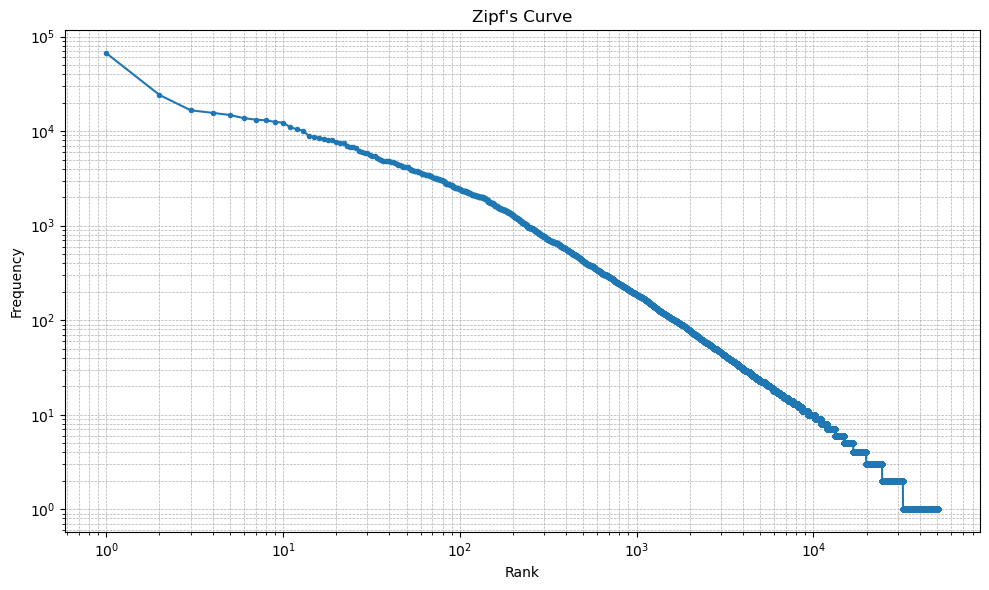

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

df=pd.read_excel(r"D:\Merge file.xlsx")

def preprocess_text(text):
    words = word_tokenize(text)
    return words

text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

all_words = []

for comment in text_column:
    words = preprocess_text(comment)
    all_words.extend(words)

fdist = FreqDist(all_words)

# Create a list of tuples containing word and its frequency
word_freq_tuples = [(word, freq) for word, freq in fdist.items()]

# Sort the list by frequency in descending order
word_freq_tuples.sort(key=lambda x: x[1], reverse=True)

# Create lists of ranks and frequencies
ranks = list(range(1, len(word_freq_tuples) + 1))
frequencies = [freq for _, freq in word_freq_tuples]

# Create a log-log plot for Zipf's curve
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Curve")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


In [1]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df = pd.read_excel('D:\Merge file.xlsx')

text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize and preprocess text
def preprocess_text(text):
    words = word_tokenize(text)
    return words

word_lengths = [[] for _ in range(8)]  # Create lists to store words of lengths 0 to 7

for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        length = len(word)
        if 1 <= length <= 7:  # Only consider words with lengths from 1 to 7
            word_lengths[length].append(word)

top_10_words = [[] for _ in range(8)]  # Create lists to store the top 10 frequent words of lengths 0 to 7

for i in range(1, 8):
    word_freq = nltk.FreqDist(word_lengths[i])
    top_10_words[i] = word_freq.most_common(10)

# Print the top 10 frequent n-letter words for n = 1 to 7
for i in range(1, 8):
    print(f"Top 10 frequent {i}-letter words:")
    for word, freq in top_10_words[i]:
        print(f"{word}: {freq}")
    print()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 frequent 1-letter words:
,: 66690
!: 8867
?: 6197
ও: 5823
এ: 4359
।: 3546
): 2516
️: 1884
.: 1744
(: 1109

Top 10 frequent 2-letter words:
এই: 24103
না: 15586
কে: 13201
আর: 12505
টা: 7560
কি: 6862
যে: 5432
এর: 5430
পর: 4668
আজ: 4187

Top 10 frequent 3-letter words:
ছবি: 12996
আমি: 12261
গান: 10973
ভাই: 8530
করে: 8104
খুব: 7394
আলম: 6910
মনে: 6817
বার: 4863
দিন: 4496

Top 10 frequent 4-letter words:
আমার: 16603
অনেক: 14789
ভালো: 13708
হিরো: 10433
মুভি: 10121
একটা: 8325
দেখে: 7633
সালে: 6619
থেকে: 5817
জন্য: 5619

Top 10 frequent 5-letter words:
অভিনয়: 5149
দেখতে: 4867
ছবিটা: 4846
গানটা: 3414
বাংলা: 3351
সত্যি: 3223
চোখের: 2896
মানুষ: 2749
দেখছি: 2462
আলমের: 2336

Top 10 frequent 6-letter words:
সুন্দর: 8736
দেখলাম: 6012
মুভিটা: 5062
সিনেমা: 4961
আমাদের: 4795
সালমান: 4687
মান্না: 3652
কিন্তু: 3431
কমেন্ট: 2809
দেখেছি: 2472

Top 10 frequent 7-letter words:
অসাধারণ: 8032
ধন্যবাদ: 2732
মানুষের: 1768
উপন্যাস: 1449
অসাধারন: 1383
দেখলাম।: 1176
সিনেমার: 1120
অভিনেতা: 938
পরিচালক: 922
মান

In [2]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df = pd.read_excel('D:\Merge file.xlsx')

text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize and preprocess text
def preprocess_text(text):
    words = word_tokenize(text)
    return words

word_lengths = [[] for _ in range(8)]  # Create lists to store words of lengths 0 to 7

for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        length = len(word)
        if 1 <= length <= 7:  # Only consider words with lengths from 1 to 7
            word_lengths[length].append(word)

top_10_words = [[] for _ in range(8)]  # Create lists to store the top 10 frequent words of lengths 0 to 7

for i in range(1, 8):
    word_freq = nltk.FreqDist(word_lengths[i])
    top_10_words[i] = word_freq.most_common(10)

# Calculate total word count
total_words = sum(len(words) for words in word_lengths[1:8])

# Print the top 10 frequent n-letter words for n = 1 to 7 with their percentages
for i in range(1, 8):
    print(f"Top 10 frequent {i}-letter words:")
    for word, freq in top_10_words[i]:
        percentage = (freq / total_words) * 100
        print(f"{word}: {freq} ({percentage:.2f}%)")
    print()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 frequent 1-letter words:
,: 66690 (4.56%)
!: 8867 (0.61%)
?: 6197 (0.42%)
ও: 5823 (0.40%)
এ: 4359 (0.30%)
।: 3546 (0.24%)
): 2516 (0.17%)
️: 1884 (0.13%)
.: 1744 (0.12%)
(: 1109 (0.08%)

Top 10 frequent 2-letter words:
এই: 24103 (1.65%)
না: 15586 (1.06%)
কে: 13201 (0.90%)
আর: 12505 (0.85%)
টা: 7560 (0.52%)
কি: 6862 (0.47%)
যে: 5432 (0.37%)
এর: 5430 (0.37%)
পর: 4668 (0.32%)
আজ: 4187 (0.29%)

Top 10 frequent 3-letter words:
ছবি: 12996 (0.89%)
আমি: 12261 (0.84%)
গান: 10973 (0.75%)
ভাই: 8530 (0.58%)
করে: 8104 (0.55%)
খুব: 7394 (0.51%)
আলম: 6910 (0.47%)
মনে: 6817 (0.47%)
বার: 4863 (0.33%)
দিন: 4496 (0.31%)

Top 10 frequent 4-letter words:
আমার: 16603 (1.13%)
অনেক: 14789 (1.01%)
ভালো: 13708 (0.94%)
হিরো: 10433 (0.71%)
মুভি: 10121 (0.69%)
একটা: 8325 (0.57%)
দেখে: 7633 (0.52%)
সালে: 6619 (0.45%)
থেকে: 5817 (0.40%)
জন্য: 5619 (0.38%)

Top 10 frequent 5-letter words:
অভিনয়: 5149 (0.35%)
দেখতে: 4867 (0.33%)
ছবিটা: 4846 (0.33%)
গানটা: 3414 (0.23%)
বাংলা: 3351 (0.23%)
সত্যি: 3223 (0.22%)
চোখ

In [3]:
import pandas as pd
import nltk
nltk.download('punkt')

# Load data
df = pd.read_excel('D:\Merge file.xlsx')

# Extract text column
text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize text
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    return words

# Initialize a dictionary to store letter frequencies
letter_freq = {}

# Process text
for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        for letter in word:
            if letter.isalpha():  # Check if the character is a letter
                letter = letter.lower()  # Convert to lowercase for case-insensitive counting
                if letter in letter_freq:
                    letter_freq[letter] += 1
                else:
                    letter_freq[letter] = 1

# Calculate total letter count
total_letters = sum(letter_freq.values())

# Calculate and print the percentage of occurrence of each letter
for letter, freq in letter_freq.items():
    percentage = (freq / total_letters) * 100
    print(f"{letter}: {freq} occurrences ({percentage:.2f}%)")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


শ: 60044 occurrences (1.51%)
খ: 101386 occurrences (2.55%)
হ: 99399 occurrences (2.50%)
স: 181783 occurrences (4.58%)
ন: 380707 occurrences (9.58%)
ক: 262163 occurrences (6.60%)
ব: 227802 occurrences (5.73%)
এ: 97609 occurrences (2.46%)
ই: 112858 occurrences (2.84%)
ম: 254246 occurrences (6.40%)
দ: 148916 occurrences (3.75%)
ষ: 25213 occurrences (0.63%)
ছ: 112960 occurrences (2.84%)
ল: 234922 occurrences (5.91%)
ট: 104091 occurrences (2.62%)
র: 421772 occurrences (10.62%)
ণ: 15562 occurrences (0.39%)
প: 106916 occurrences (2.69%)
য: 105381 occurrences (2.65%)
ত: 167495 occurrences (4.22%)
আ: 125214 occurrences (3.15%)
ধ: 32383 occurrences (0.82%)
য়: 88458 occurrences (2.23%)
অ: 55435 occurrences (1.40%)
চ: 50488 occurrences (1.27%)
থ: 33673 occurrences (0.85%)
ড়: 9973 occurrences (0.25%)
গ: 85626 occurrences (2.16%)
ঝ: 4936 occurrences (0.12%)
ভ: 87251 occurrences (2.20%)
জ: 75456 occurrences (1.90%)
ফ: 13074 occurrences (0.33%)
ঠ: 6482 occurrences (0.16%)
ও: 31850 occurrences (0.80%)


In [4]:
import pandas as pd
import nltk
nltk.download('punkt')

# Load data
df = pd.read_excel('D:\Merge file.xlsx')

# Extract text column
text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize text
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    return words

# Initialize a dictionary to store letter frequencies
letter_freq = {}

# Process text
for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        for letter in word:
            if '\u0980' <= letter <= '\u09FF':  # Check if the character is a Bengali letter
                if letter in letter_freq:
                    letter_freq[letter] += 1
                else:
                    letter_freq[letter] = 1

# Calculate total letter count
total_letters = sum(letter_freq.values())

# Calculate and print the percentage of occurrence of each Bengali letter
for letter, freq in letter_freq.items():
    percentage = (freq / total_letters) * 100
    print(f"{letter}: {freq} occurrences ({percentage:.2f}%)")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


শ: 60044 occurrences (0.95%)
ে: 574442 occurrences (9.10%)
খ: 101386 occurrences (1.61%)
হ: 99399 occurrences (1.57%)
া: 767818 occurrences (12.16%)
স: 181783 occurrences (2.88%)
ি: 348397 occurrences (5.52%)
ন: 380707 occurrences (6.03%)
ক: 262163 occurrences (4.15%)
ব: 227802 occurrences (3.61%)
এ: 97609 occurrences (1.55%)
ই: 112858 occurrences (1.79%)
ম: 254246 occurrences (4.03%)
দ: 148916 occurrences (2.36%)
ষ: 25213 occurrences (0.40%)
ছ: 112960 occurrences (1.79%)
ল: 234922 occurrences (3.72%)
ট: 104091 occurrences (1.65%)
র: 421772 occurrences (6.68%)
ু: 154211 occurrences (2.44%)
ণ: 15562 occurrences (0.25%)
প: 106916 occurrences (1.69%)
্: 196444 occurrences (3.11%)
য: 105381 occurrences (1.67%)
ত: 167495 occurrences (2.65%)
আ: 125214 occurrences (1.98%)
ধ: 32383 occurrences (0.51%)
৩: 6681 occurrences (0.11%)
০: 17847 occurrences (0.28%)
ঁ: 6211 occurrences (0.10%)
য়: 88458 occurrences (1.40%)
অ: 55435 occurrences (0.88%)
ং: 20130 occurrences (0.32%)
চ: 50488 occurrences (0

In [5]:
import pandas as pd
import nltk
nltk.download('punkt')

# Load data
df = pd.read_excel('D:\Merge file.xlsx')

# Extract text column
text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize text
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    return words

# Initialize a dictionary to store letter frequencies
letter_freq = {}

# Process text
for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        for letter in word:
            if '\u0980' <= letter <= '\u09FF':  # Check if the character is a Bengali letter
                if letter in letter_freq:
                    letter_freq[letter] += 1
                else:
                    letter_freq[letter] = 1

# Calculate total letter count
total_letters = sum(letter_freq.values())

# Create a DataFrame for the results
results = {'Letter': [], 'Occurrences': [], 'Percentage': []}
for letter, freq in letter_freq.items():
    percentage = (freq / total_letters) * 100
    results['Letter'].append(letter)
    results['Occurrences'].append(freq)
    results['Percentage'].append(percentage)

# Create a Pandas DataFrame
df_results = pd.DataFrame(results)

# Save the results as an Excel file
output_excel_path = 'Bangla_Letter_Percentage.xlsx'
df_results.to_excel(output_excel_path, index=False)
print(f"Percentage of occurrence of each Bangla letter saved to {output_excel_path}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Percentage of occurrence of each Bangla letter saved to Bangla_Letter_Percentage.xlsx


In [6]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df = pd.read_excel('D:\Merge file.xlsx')

text_column = df['Comment']
text_column = text_column.apply(lambda x: str(x))

# Tokenize and preprocess text
def preprocess_text(text):
    words = word_tokenize(text)
    return words

word_lengths = [[] for _ in range(8)]  # Create lists to store words of lengths 0 to 7

for comment in text_column:
    words = preprocess_text(comment)
    for word in words:
        length = len(word)
        if 1 <= length <= 7:  # Only consider words with lengths from 1 to 7
            word_lengths[length].append(word)

top_10_words = [[] for _ in range(8)]  # Create lists to store the top 10 frequent words of lengths 0 to 7

for i in range(1, 8):
    word_freq = nltk.FreqDist(word_lengths[i])
    top_10_words[i] = word_freq.most_common(10)

# Create a Pandas DataFrame for the results
results = {'Length': [], 'Word': [], 'Frequency': [], 'Percentage': []}
for i in range(1, 8):
    for word, freq in top_10_words[i]:
        percentage = (freq / total_words) * 100
        results['Length'].append(i)
        results['Word'].append(word)
        results['Frequency'].append(freq)
        results['Percentage'].append(percentage)

df_results = pd.DataFrame(results)

# Print the top 10 frequent n-letter words for n = 1 to 7 in a table with percentages
print(df_results)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


    Length     Word  Frequency  Percentage
0        1        ,      66690    4.556451
1        1        !       8867    0.605819
2        1        ?       6197    0.423397
3        1        ও       5823    0.397844
4        1        এ       4359    0.297819
..     ...      ...        ...         ...
65       7  দেখলাম।       1176    0.080348
66       7  সিনেমার       1120    0.076522
67       7  অভিনেতা        938    0.064087
68       7  পরিচালক        922    0.062994
69       7  মান্নার        874    0.059714

[70 rows x 4 columns]


In [1]:
import pandas as pd
import nltk
nltk.download('punkt')

# Load data
df = pd.read_excel('D:\Merge file.xlsx')

# Extract text column
text_column = df['Comment'].astype(str)

# Tokenize text
def tokenize_and_count_bengali_letters(text, letter_freq):
    words = nltk.word_tokenize(text)
    for word in words:
        for letter in word:
            if '\u0980' <= letter <= '\u09FF':  # Check if the character is a Bengali letter
                letter_freq[letter] = letter_freq.get(letter, 0) + 1

# Initialize a dictionary to store letter frequencies
letter_freq = {}

# Process text
text_column.apply(lambda text: tokenize_and_count_bengali_letters(text, letter_freq))

# Calculate total letter count
total_letters = sum(letter_freq.values())

# Create a DataFrame for the results
results = {
    'Letter': list(letter_freq.keys()),
    'Occurrences': list(letter_freq.values()),
    'Percentage': [(freq / total_letters) * 100 for freq in letter_freq.values()]
}

# Create a Pandas DataFrame
df_results = pd.DataFrame(results)

# Save the results as an Excel file
output_excel_path = 'Bangla_Letter_Percentage.xlsx'
df_results.to_excel(output_excel_path, index=False)
print(f"Percentage of occurrence of each Bangla letter saved to {output_excel_path}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Percentage of occurrence of each Bangla letter saved to Bangla_Letter_Percentage.xlsx
